# mtwaffle quickstart tutorial

In [1]:
import mtwaffle

Load a response function from an Electrical Data Interchange (EDI) file:

In [2]:
site = mtwaffle.read_edi('bwa2890.edi')

When data is read in like this it will be loaded into an ``mtwaffle.mt.Site`` object. This is a dict-like object with attribute access.

The fundamental data that make up the response function are stored as ``numpy.ndarrays`` and can be changed by the user:

In [3]:
site.freqs

array([  3.05180000e-02,   4.57760000e-02,   6.10350000e-02,
         2.44140000e-01,   4.88280000e-01,   7.32420000e-01,
         1.46480000e+00,   1.95310000e+00,   2.92970000e+00,
         3.90620000e+00,   5.85940000e+00,   7.81250000e+00,
         1.17190000e+01,   1.56250000e+01,   2.34380000e+01,
         3.12500000e+01,   4.68750000e+01,   6.25000000e+01,
         9.37500000e+01,   1.25000000e+02])

And the impedance tensors:

In [4]:
site.zs

array([[[ -2.65220 -7.93610000e-01j,   3.88170 +3.11400000e+00j],
        [ -4.35530 -2.89100000e+00j,   2.36610 +5.98250000e-01j]],

       [[ -3.41790 -9.43450000e-01j,   5.60120 +3.07000000e+00j],
        [ -5.70650 -3.17900000e+00j,   2.65310 +7.51900000e-01j]],

       [[ -3.41980 -4.85940000e-01j,   7.18780 +3.00080000e+00j],
        [ -6.82150 -3.17030000e+00j,   2.26560 +9.14630000e-01j]],

       [[ -3.12760 +6.84620000e-02j,  10.28200 +3.05620000e+00j],
        [ -9.20030 -2.94890000e+00j,   2.97610 +2.78910000e-01j]],

       [[ -3.63390 -4.36250000e-01j,  11.35300 +2.62070000e+00j],
        [-10.21700 -2.76610000e+00j,   3.23880 +3.39670000e-01j]],

       [[ -3.65310 -3.70740000e-01j,  11.62500 +2.23880000e+00j],
        [-10.62500 -2.76940000e+00j,   3.33570 +4.11020000e-01j]],

       [[ -3.96470 -5.06570000e-01j,  12.42100 +2.66420000e+00j],
        [-11.68100 -3.31960000e+00j,   3.71790 +1.01220000e-01j]],

       [[ -4.01280 -4.82180000e-01j,  12.71400 +2.76330000e+00

Other properties are lazy i.e. they are calculated when they are accessed:

In [5]:
site.res_xy

array([ 162.29497929,  178.25210346,  198.80157116,   94.25729699,
         55.60689665,   38.27116967,   22.03429856,   17.33466007,
         13.00330307,   10.92999288,    8.49688856,    6.68756833,
          5.29417564,    4.08401256,    3.10490973,    2.60361372,
          1.98916436,    1.70708189,    1.38497736,    1.28020231])

Attributes are also available through item-style access, as ``mtwaffle.mt.Site`` is inherited from ``attrdict.AttrDict`` ([more info](https://pypi.org/project/attrdict/)):

In [6]:
site['phase_yx']

array([ 33.57576734,  29.12148116,  24.92670354,  17.77180592,
        15.1488215 ,  14.60906321,  15.86451347,  16.11812646,
        16.72156801,  15.98943468,  15.2466853 ,  15.03600958,
        14.4199947 ,  16.08410546,  16.96176239,  17.80488821,
        20.36787694,  22.90945926,  26.73695999,  32.45592854])

A complete list of the attributes available for an mtwaffle.Site object can be produced using the ``site.help()`` method:

In [7]:
site.help()


Attributes of mtwaffle.mtsite.Site are calculated using functions from the mtwaffle.mt module:

 mtsite.Site         mtwaffle.mt function
  attribute       (args are Site attributes)                  Function description
--------------  ------------------------------  ----------------------------------------------
appres          appres(zs, freqs)               Convert imp. tensor(s) (mV/km/nT) to apparent resistivity(s) (ohm.m).
bostick         bostick(freqs, appres, phases)  Bostick transform of imp. tensor(s) - returns tuple (depths, resistivities).
inv_imag_sign   inv_imag_sign(zs)               Invert sign of imaginary parts of imp. tensor(s).
mV_km_nT2ohms   mV_km_nT2ohms(zs)               Convert imp. tensor(s) from mV/km/nT to ohms
normfreqs       normfreqs(zs, freqs)            Normalise imp. tensor(s) magnitude by multiplying by sqrt(period).
ohms2mV_km_nT   ohms2mV_km_nT(zs)               Convert imp. tensor(s) from ohms to mV/km/nT.
phase           phase(zs)               

In case it is not clear, here is an example. For this site we can apply the Bostick transform to obtain a list of the depths from the transform, and the resistivities:

In [8]:
depths, res = site.bostick

And now check the xy values:

In [9]:
depths[:, 0, 1]

array([ 25917.42983956,  22177.66581258,  20283.26455507,   6983.21549348,
         3792.68945959,   2569.05376823,   1378.40827824,   1058.7973563 ,
          748.74285369,    594.49762655,    427.97737552,    328.81871257,
          238.8753404 ,    181.6983339 ,    129.35452853,    102.5842502 ,
           73.21197411,     58.73603037,     43.19695382,     35.96679334])

In [10]:
res[:, 0, 1]

array([ 214.77084608,  380.2023934 ,  590.79819084,  418.19922404,
        329.41400781,  277.70555103,  141.77586806,  109.89628032,
         75.93052208,   62.57584196,   46.01172905,   35.03032577,
         27.83959644,   18.74966943,   13.10204006,   10.14087511,
          6.7323757 ,    5.06744107,    3.52487843,    2.40519142])

This is actually calculated behind the scenes using a stand-alone function from ``mtwaffle.mt``, as described in the list just above. We can do the same manually to illustrate the process:

In [11]:
depths_xy, res_xy = mtwaffle.bostick(site.freqs, site.res_xy, site.phase_xy)

In [12]:
depths_xy

array([ 25917.42983956,  22177.66581258,  20283.26455507,   6983.21549348,
         3792.68945959,   2569.05376823,   1378.40827824,   1058.7973563 ,
          748.74285369,    594.49762655,    427.97737552,    328.81871257,
          238.8753404 ,    181.6983339 ,    129.35452853,    102.5842502 ,
           73.21197411,     58.73603037,     43.19695382,     35.96679334])

There are many more functions in ``mtwaffle.mt``, but they are often only intermediary properties which are not of interest. You can use them all manually, check the documention for more information:

In [13]:
help(mtwaffle.mt)

Help on module mtwaffle.mt in mtwaffle:

NAME
    mtwaffle.mt - General MT functions.

CLASSES
    builtins.object
        L
    
    class L(builtins.object)
     |  Methods defined here:
     |  
     |  __init__(s, T)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)

FUNCTIONS
    Z3(z)
    
    Z4(z)
    
    appres(zs, freqs)
        Convert imp. tensor(s) (mV/km/nT) to apparent resistivity(s) (ohm.m).
        
        Args:
            - *freqs*: float or n x 1 ndarray
            - *zs*: float, 2 x 2 complex ndarray or n x 2 x 2 complex ndarray with
              impedance in units of mV/km/nT
        
        Returns: *res*
            - *res*: same shap

## Canned graphs

In [14]:
%matplotlib nbagg

Graphing functions are also wrapped from ``mtwaffle.graphs``:

<IPython.core.display.Javascript object>


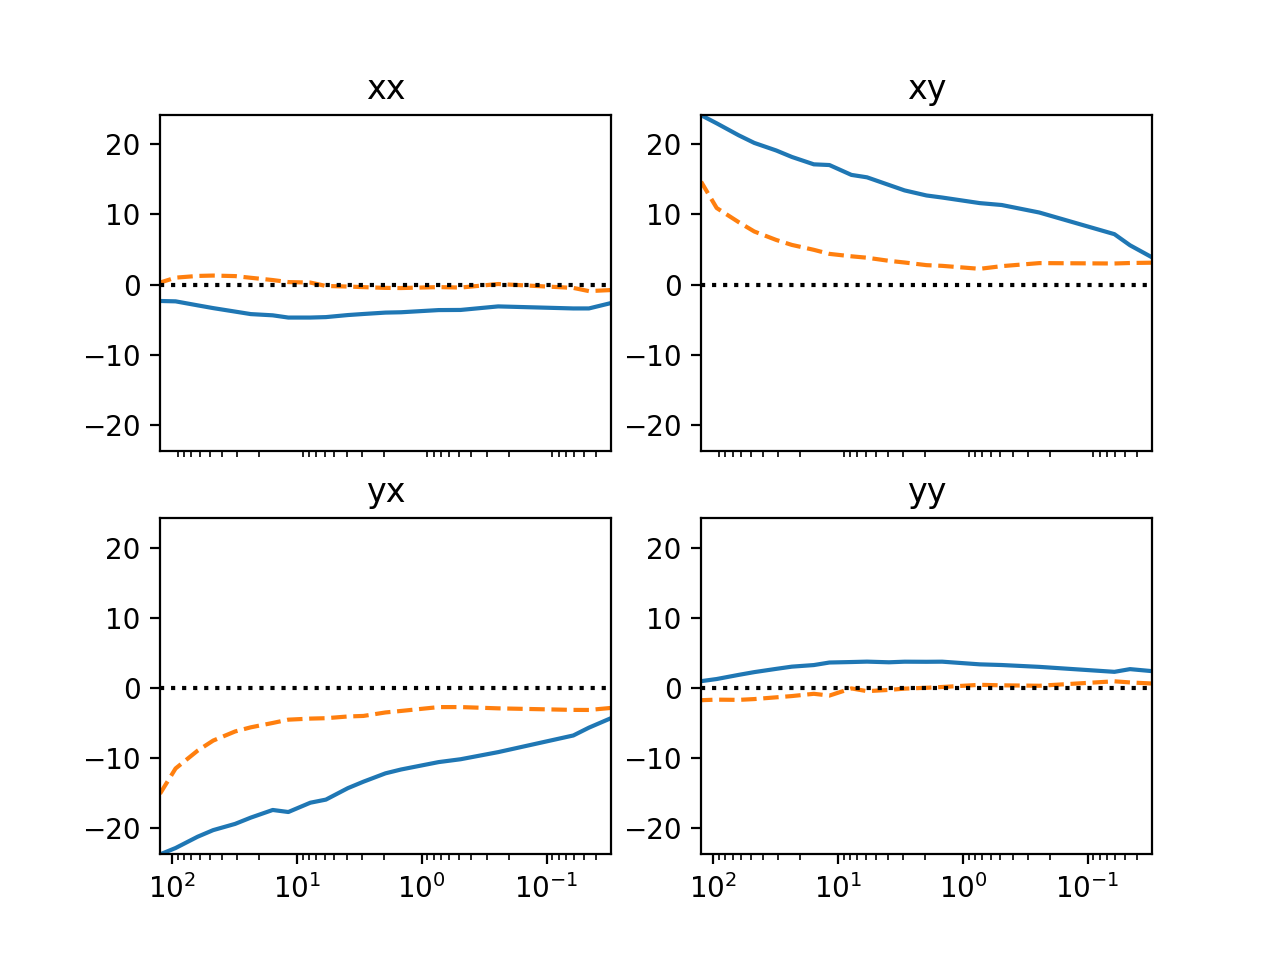

In [15]:
site.plot_impedance_tensors()

<IPython.core.display.Javascript object>


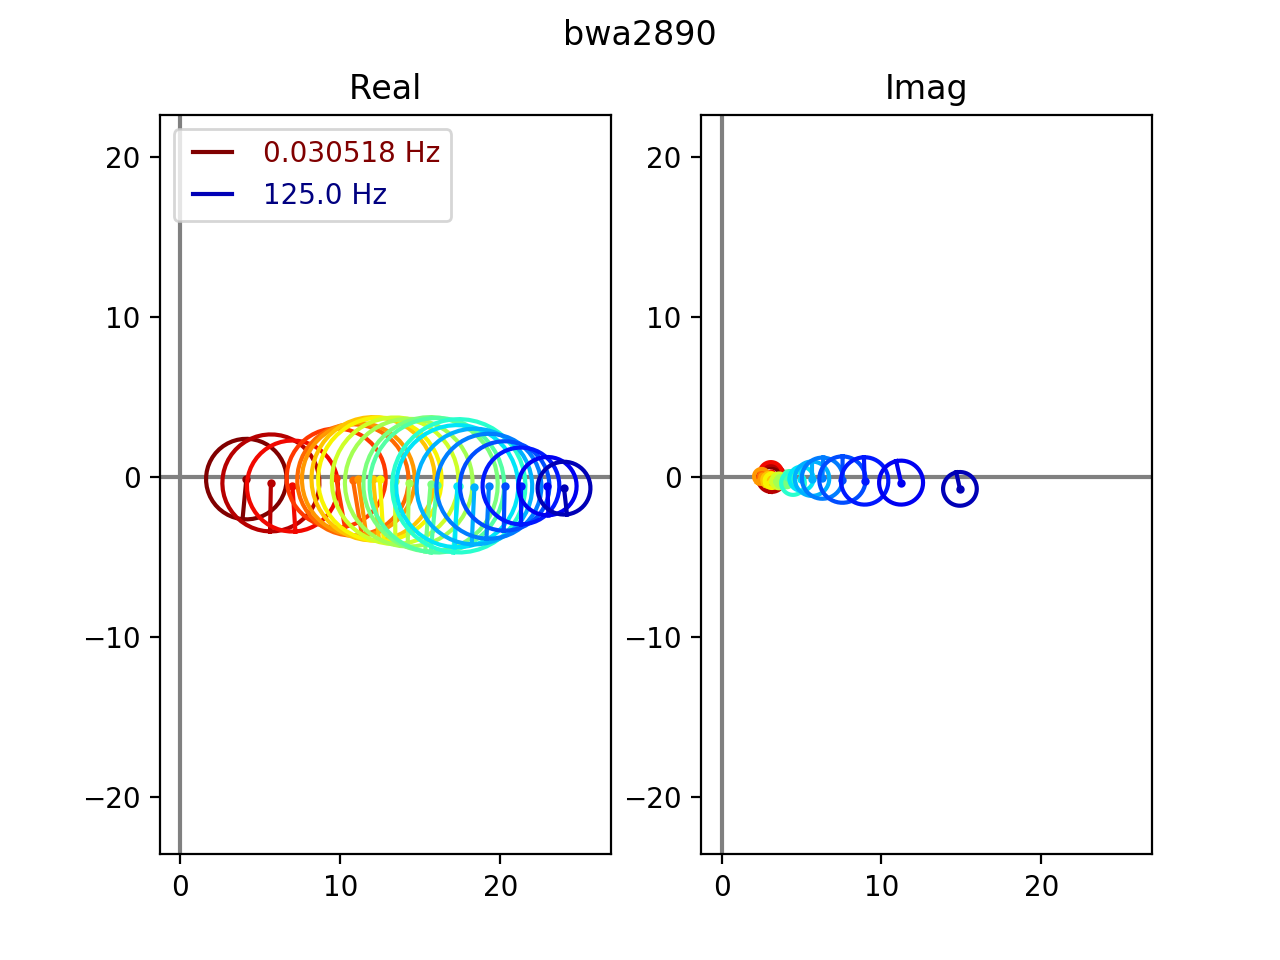

In [19]:
axreal, aximag = site.plot_mohr_imp()

<IPython.core.display.Javascript object>


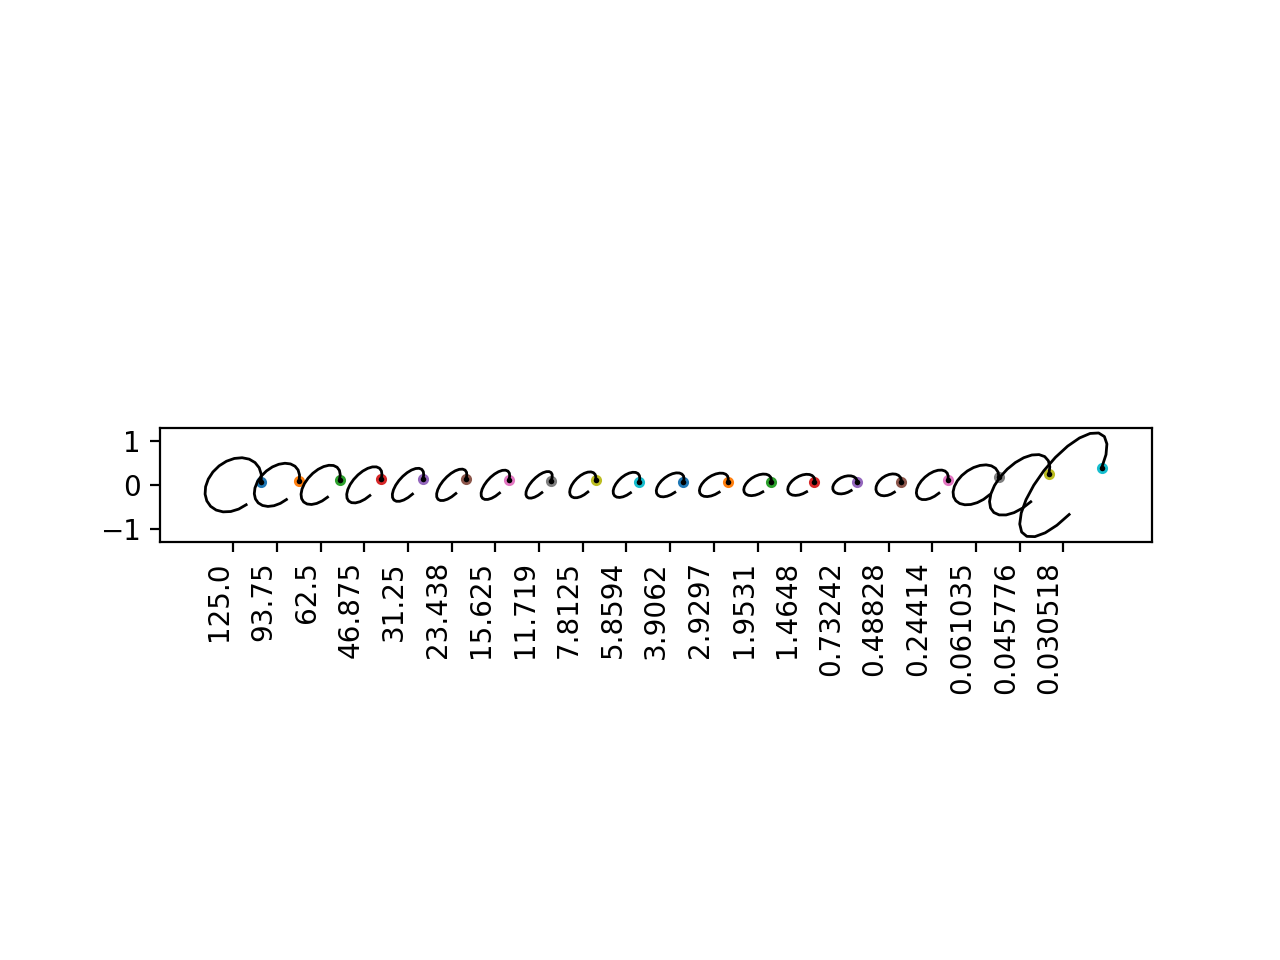

In [16]:
site.plot_ptensell()

<IPython.core.display.Javascript object>


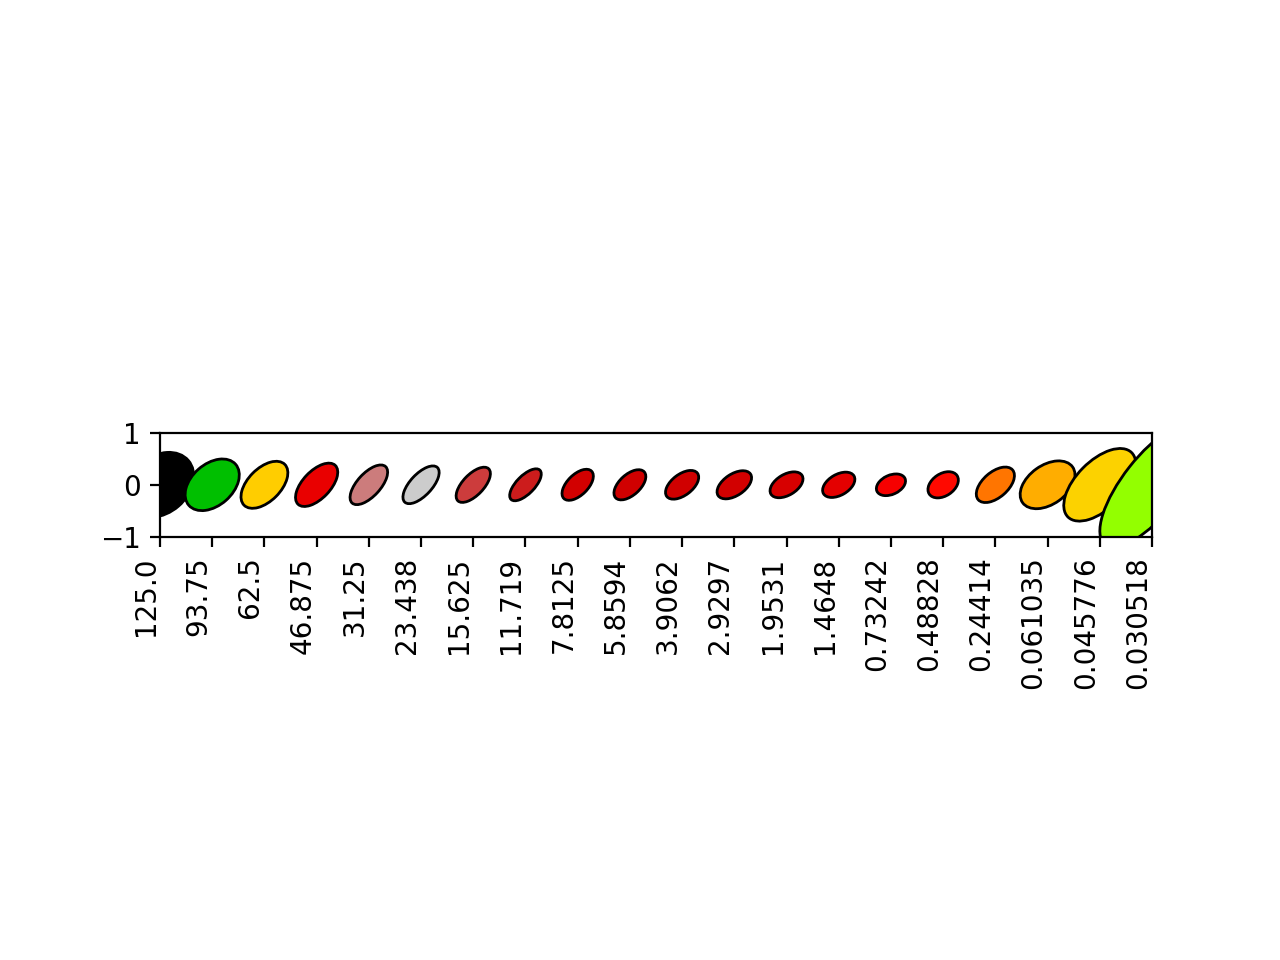

In [18]:
site.plot_ptensell_filled(site.ptens_max)

<IPython.core.display.Javascript object>


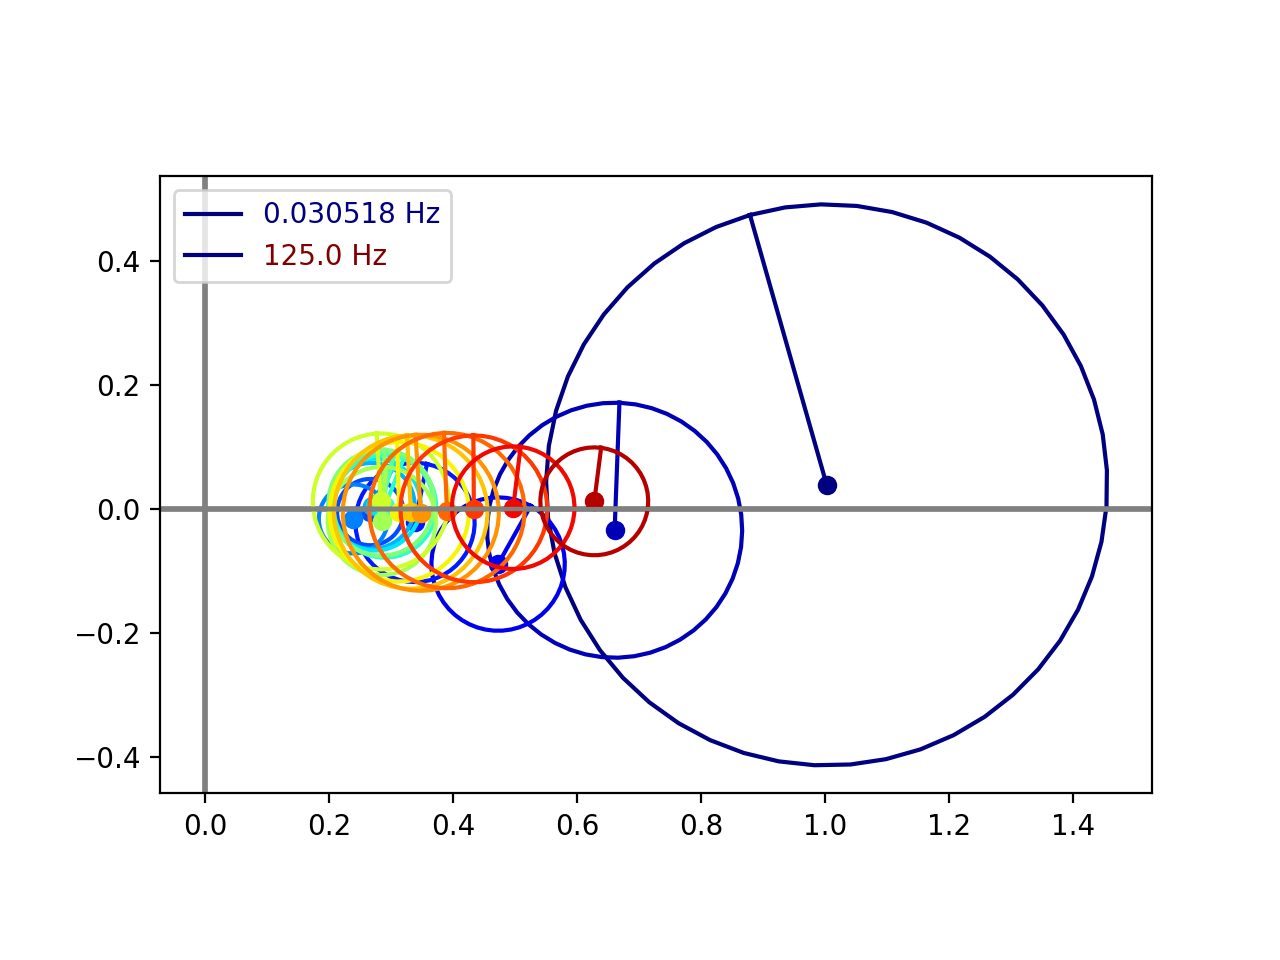

In [17]:
site.plot_mohr_ptensor()